In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/processed_transaction.csv')
df.head()

,Unnamed: 0,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionType
0,0,733493772,3,5000.00,492,9184,0,5000.0,0.00,733493772,492,0,0,17,3,1065,0,1,111.33,1
1,1,733493772,3,4888.67,492,9184,0,5000.0,111.33,733493772,492,0,1,17,3,2084,0,2,24.75,1
2,2,733493772,3,4863.92,492,9184,0,5000.0,136.08,733493772,492,0,1,17,3,1065,0,1,187.40,1
3,3,733493772,3,4676.52,492,9184,0,5000.0,323.48,733493772,492,0,0,17,3,1065,0,0,227.34,1
4,4,733493772,3,4449.18,492,9184,0,5000.0,550.82,733493772,492,0,1,17,3,1065,0,0,0.00,0


In [3]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']

Feature ranking:
1. feature 17 (0.144404)
2. feature 14 (0.139284)
3. feature 0 (0.127545)
4. feature 8 (0.123483)
5. feature 3 (0.122744)
6. feature 10 (0.045697)
7. feature 5 (0.044313)
8. feature 4 (0.042716)
9. feature 1 (0.042467)
10. feature 9 (0.042432)
11. feature 16 (0.038631)
12. feature 12 (0.031282)
13. feature 7 (0.028409)
14. feature 15 (0.013475)
15. feature 18 (0.005823)
16. feature 6 (0.003857)
17. feature 13 (0.001509)
18. feature 2 (0.001469)
19. feature 11 (0.000462)


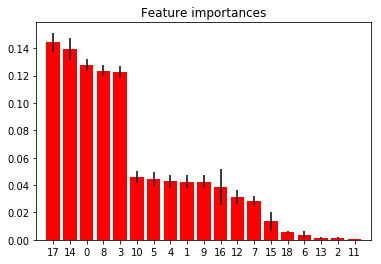

In [8]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline  

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [17]:
X.shape

(633846, 19)

Refernce code from 

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [16]:
importances

array([0.12754479, 0.04246717, 0.00146892, 0.12274389, 0.04271621,
       0.04431277, 0.00385703, 0.02840897, 0.1234832 , 0.04243238,
       0.04569652, 0.00046192, 0.03128185, 0.00150867, 0.13928397,
       0.01347464, 0.03863078, 0.14440371, 0.00582261])

In [18]:
indices

array([17, 14,  0,  8,  3, 10,  5,  4,  1,  9, 16, 12,  7, 15, 18,  6, 13,
        2, 11])

In [27]:
df.columns

Index(['Unnamed: 0', 'accountNumber', 'acqCountry', 'availableMoney',
       'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit',
       'currentBalance', 'customerId', 'enteredCVV',
       'expirationDateKeyInMatch', 'isFraud', 'merchantCategoryCode',
       'merchantCountryCode', 'merchantName', 'posConditionCode',
       'posEntryMode', 'transactionAmount', 'transactionType'],
      dtype='object')

In [26]:
import csv
with open('innovators.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for f in range(X.shape[1]):
        writer.writerow([indices[f], X.columns[indices[f]], importances[indices[f]]])